## Problem Statement:

LoanTap is an online platform committed to delivering customized loan products to millennials. 
They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen. As a data scientist we should analyze the current trends and also suggest them whether the given individual is credit worthy or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
data = pd.read_csv('logistic_regression.txt')

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [5]:
data.shape  # There are 3,96,030 rows and 27 columns

(396030, 27)

In [6]:
# this helps us in better understanding of our data and in which format our data is stored.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<AxesSubplot:xlabel='term', ylabel='count'>

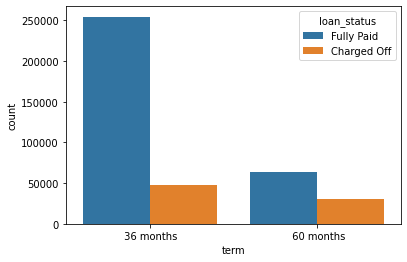

In [8]:
# If the term of loan is high, there are more percentage of loans which are charged off
sns.countplot(x = data['term'], hue=data['loan_status'])

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

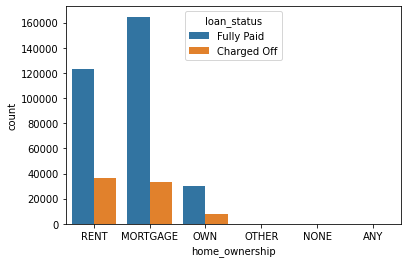

In [9]:
sns.countplot( x = data['home_ownership'], hue = data['loan_status'])

In [10]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [11]:
# Dropping the three categories which are less in number ( < 0.5% of the data)
data.drop(data[(data['home_ownership'] == 'OTHER') | (data['home_ownership'] == 'NONE') | (data['home_ownership'] == 'ANY')].index, inplace=True)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

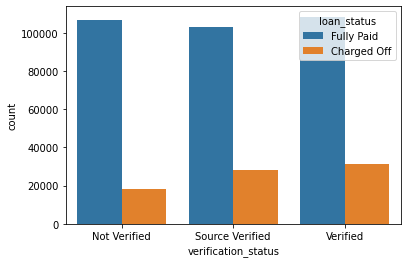

In [12]:
#Interestingly we could see that the verified loans are charged off more
sns.countplot(data['verification_status'], hue = data['loan_status'])


<AxesSubplot:xlabel='application_type', ylabel='count'>

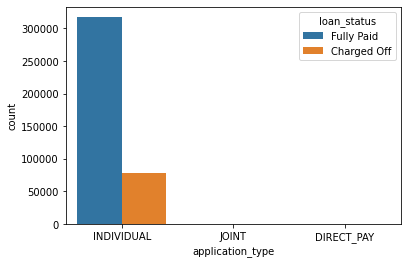

In [13]:
sns.countplot(x= data['application_type'], hue = data['loan_status'])

In [14]:
data['loan_status'].value_counts(normalize= True) * 100

Fully Paid     80.385669
Charged Off    19.614331
Name: loan_status, dtype: float64

In [21]:
data[data['grade'] == 'A']['loan_status'].value_counts(normalize=True)*100

Fully Paid     93.712692
Charged Off     6.287308
Name: loan_status, dtype: float64

In [22]:
data['application_type'].value_counts()

INDIVIDUAL    395173
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [23]:
data['initial_list_status'].value_counts()

f    237934
w    157950
Name: initial_list_status, dtype: int64

In [24]:
# Duplicate check
# There are no duplicates in the data
data[data.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [25]:
# Missing data check
def missing_data(data):
    
    total_missing_data = data.isnull().sum().sort_values(ascending = False)
    percent_missing_data = ((data.isnull().sum() / len(data)) * 100).sort_values(ascending = False)
    missing = pd.concat([total_missing_data, percent_missing_data], axis = 1, keys = ['Total', 'Percent'])
    return missing

missing_data(data)

,Total,Percent
mort_acc,37715,9.526781
emp_title,22918,5.789070
emp_length,18297,4.621808
title,1755,0.443312
pub_rec_bankruptcies,533,0.134635
revol_util,274,0.069212
loan_amnt,0,0.000000
dti,0,0.000000
application_type,0,0.000000
initial_list_status,0,0.000000


In [26]:
# Missing value treatment
# As we have good enough data to train our model, we chose to remove the missing data
data.dropna(inplace = True)
data = data.reset_index()

In [27]:
data.shape # after removing the missing data, we have 3,35,868 rows and 27 columns

(335809, 28)

## Data Preparation

### Creation Of Flags
- converting mort_acc, pub_rec and pub_rec_bankruptcies columns to have value 1 if the is value is more than 1 and 0 if the value is less than 1

In [28]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
        

In [29]:
data['pub_rec'].value_counts()

0.0     285138
1.0      43496
2.0       4916
3.0       1352
4.0        469
5.0        210
6.0        110
7.0         47
8.0         31
9.0         11
10.0        10
11.0         5
13.0         4
12.0         3
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [30]:
num_col = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc',]
for col in num_col:
    
    p_25 = data[col].quantile(0.25)
    p_75 = data[col].quantile(0.75)
    
    IQR = p_75 - p_25
    lower_bound = p_25 - 1.5 * IQR
    upper_bound = p_75 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    data.drop(outliers.index, inplace = True)

In [31]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [32]:
# Converting the target variable into binary
data['loan_status'] = data['loan_status'].apply( lambda x : x.strip())
data['loan_status'] = data['loan_status'].map({'Fully Paid' : 0, 'Charged Off' : 1})
data['loan_status']

0         0
1         0
2         0
3         0
4         1
         ..
335803    0
335804    0
335805    0
335807    0
335808    0
Name: loan_status, Length: 285187, dtype: int64

In [33]:
data.shape

(285187, 28)

In [34]:
data.head()

,index,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,"679 Luna Roads\r\nGreggshire, VA 11650"


### One-hot encoding
- we are doing one hot encoding on home_ownership, verification_status, application_type and initial_list_status columns
- This type of encoding is used when the data is nominal ( have no specific order )

In [35]:
# creating a dummy variable for the column 'home_ownership' and  dropping the first one
home_ownership_dummies = pd.get_dummies(data['home_ownership'], prefix = 'home_ownership', drop_first = True)

#Adding the results to the main dataframe
data = pd.concat([data,home_ownership_dummies], axis = 1)

In [36]:
# creating a dummy variable for the column 'verification_status' and  dropping the first one
verification_status_dummies = pd.get_dummies(data['verification_status'], prefix = 'verification_status', drop_first = True)

#Adding the results to the main dataframe
data = pd.concat([data,verification_status_dummies], axis = 1)

In [37]:
# creating a dummy variable for the column 'initial_list_status' and  dropping the first one
initial_list_status_dummies = pd.get_dummies(data['initial_list_status'], prefix = 'initial_list_status', drop_first = True)

#Adding the results to the main dataframe
data = pd.concat([data,initial_list_status_dummies], axis = 1)

In [38]:
# creating a dummy variable for the column 'application_type' and  dropping the first one
application_type_dummies = pd.get_dummies(data['application_type'], prefix = 'application_type', drop_first = True)

#Adding the results to the main dataframe
data = pd.concat([data,application_type_dummies], axis = 1)

In [39]:
# we can drop few columns as we already created dummy variales for those columns
# we are also dropping the column called 'title'. since this is a kind of repeated variable. 
#'purpose' column also conveys the same info.
data = data.drop(['home_ownership','application_type','initial_list_status','verification_status','title'], axis = 1)

In [40]:
data['term'].value_counts()

 36 months    218882
 60 months     66305
Name: term, dtype: int64

In [41]:
# converting term column to float by removing the characters
data['term'] = data['term'].apply(lambda x : x.split(' ')[1])
data['term'] = data['term'].astype('float')

In [42]:
data['term']

0         36.0
1         36.0
2         36.0
3         36.0
4         60.0
          ... 
335803    36.0
335804    36.0
335805    60.0
335807    36.0
335808    60.0
Name: term, Length: 285187, dtype: float64

In [43]:
data['zip_code'] = data['address'].apply(lambda x : x[-5:])

In [44]:
data['zip_code'].value_counts()

70466    41064
30723    40883
22690    40629
48052    40296
00813    32859
29597    32571
05113    32560
93700     8132
11650     8104
86630     8089
Name: zip_code, dtype: int64

In [45]:
#Dropping the address column as we already extracted the zip code from this.
data = data.drop(['address'], axis = 1)

## Target Encoding

- we perform target encoding on emp_title and purpose
- Since there are many categories in those columns, one hot encoding doesn't make sense


In [46]:
# performing target encoding on emp_title column
encoder = TargetEncoder()
data['emp_title'] = encoder.fit_transform(data['emp_title'],data['loan_status'])
data['emp_title']

0         0.253333
1         0.317273
2         0.125067
3         0.198600
4         0.198600
            ...   
335803    0.168285
335804    0.198600
335805    0.198600
335807    0.285714
335808    0.198600
Name: emp_title, Length: 285187, dtype: float64

In [47]:
# performing target encoding on purpose column
data['purpose']  = encoder.fit_transform(data['purpose'], data['loan_status'])
data['purpose']

0         0.192286
1         0.209013
2         0.168131
3         0.168131
4         0.168131
            ...   
335803    0.209013
335804    0.209013
335805    0.209013
335807    0.209013
335808    0.209013
Name: purpose, Length: 285187, dtype: float64

In [48]:
#performing target encoding on zip_code column
data['zip_code'] = encoder.fit_transform(data['zip_code'], data['loan_status'])
data['zip_code']

0         0.195648
1         0.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
335803    0.000000
335804    0.000000
335805    0.196903
335807    0.198763
335808    0.000000
Name: zip_code, Length: 285187, dtype: float64

In [49]:
data['emp_length'].value_counts()

10+ years    94613
2 years      26988
3 years      23624
< 1 year     23551
5 years      20053
1 year       19543
4 years      17498
7 years      16276
6 years      16054
8 years      15087
9 years      11900
Name: emp_length, dtype: int64

In [50]:
data['emp_length'] = data['emp_length'].apply(lambda x : x.split(' ')[0])

In [51]:
data['emp_length'].value_counts()

10+    94613
2      26988
3      23624
<      23551
5      20053
1      19543
4      17498
7      16276
6      16054
8      15087
9      11900
Name: emp_length, dtype: int64

In [52]:
data.loc[data['emp_length'] == '10+', ['emp_length']] = 10
data.loc[data['emp_length'] == '<', ['emp_length']] = 0

In [53]:
data['emp_length'] = data['emp_length'].astype('float')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285187 entries, 0 to 335808
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   index                                285187 non-null  int64  
 1   loan_amnt                            285187 non-null  float64
 2   term                                 285187 non-null  float64
 3   int_rate                             285187 non-null  float64
 4   installment                          285187 non-null  float64
 5   grade                                285187 non-null  object 
 6   sub_grade                            285187 non-null  object 
 7   emp_title                            285187 non-null  float64
 8   emp_length                           285187 non-null  float64
 9   annual_inc                           285187 non-null  float64
 10  issue_d                              285187 non-null  object 
 11  loan_status  

In [55]:
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [56]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'A5', 'E4', 'C1',
       'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5', 'A4',
       'F4', 'E3', 'D4', 'F5', 'G2', 'C4', 'F1', 'F3', 'G4', 'F2', 'G3',
       'G1', 'G5'], dtype=object)

In [57]:
# Label encoding the values from grade and sub_grade column
data['grade'] = data['grade'].map({'A' : 7, 'B' : 6, 'C': 5, 'D' : 4, 'E': 3, 'F' : 2, 'G' : 1})
data['sub_grade'] = data['sub_grade'].map({'A1' : 35, 'A2' : 34, 'A3' : 33, 'A4' : 32, 'A5' : 31, 
                                           'B1' : 30, 'B2' : 29, 'B3' : 28, 'B4' : 27, 'B5' : 26,
                                           'C1' : 25, 'C2' : 24, 'C3' : 23, 'C4' : 22, 'C5' : 21, 
                                           'D1' : 20, 'D2' : 19, 'D3' : 18, 'D4' : 17, 'D5' : 16,
                                           'E1' : 15, 'E2' : 14, 'E3' : 13, 'E4' : 12, 'E5' : 11, 
                                           'F1' : 10, 'F2' : 9, 'F3' : 8, 'F4' : 7, 'F5' : 6,
                                           'G1' : 5, 'G2' : 4, 'G3' : 3, 'G4' : 2,'G5' : 1})

In [58]:
# Converting the issue_d and earliest_cr_line columns to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

In [59]:
# creating this column to analyze the trends of loan disbursal
data['issued_month'] = data['issue_d'].apply(lambda x : x.month_name())

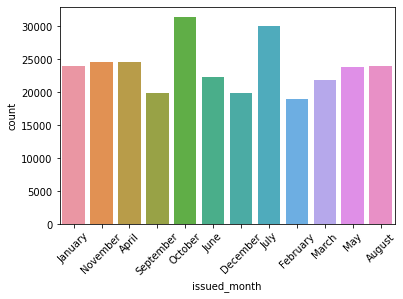

In [61]:
sns.countplot(data['issued_month'])
plt.xticks(rotation= 45)
plt.show()

- October and July are the months where more loans are disbursed

In [62]:
data['issued_year'] = data['issue_d'].apply(lambda x : x.year)

In [63]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x : x.year)

In [64]:
#creating a new column to get the loan history of individual
data['loan_history_in_yrs'] = data['issued_year'] - data['earliest_cr_line']

In [65]:
# Dropping earliest_cr_line column as we already created a new column using that.
data = data.drop(['earliest_cr_line'], axis = 1)

In [66]:
# Dropping few columns like index, issued_month, issue_d
data = data.drop(['index','issued_month', 'issue_d'], axis = 1)

In [67]:
data['pub_rec'].value_counts()

0    239541
1     45646
Name: pub_rec, dtype: int64

<AxesSubplot:>

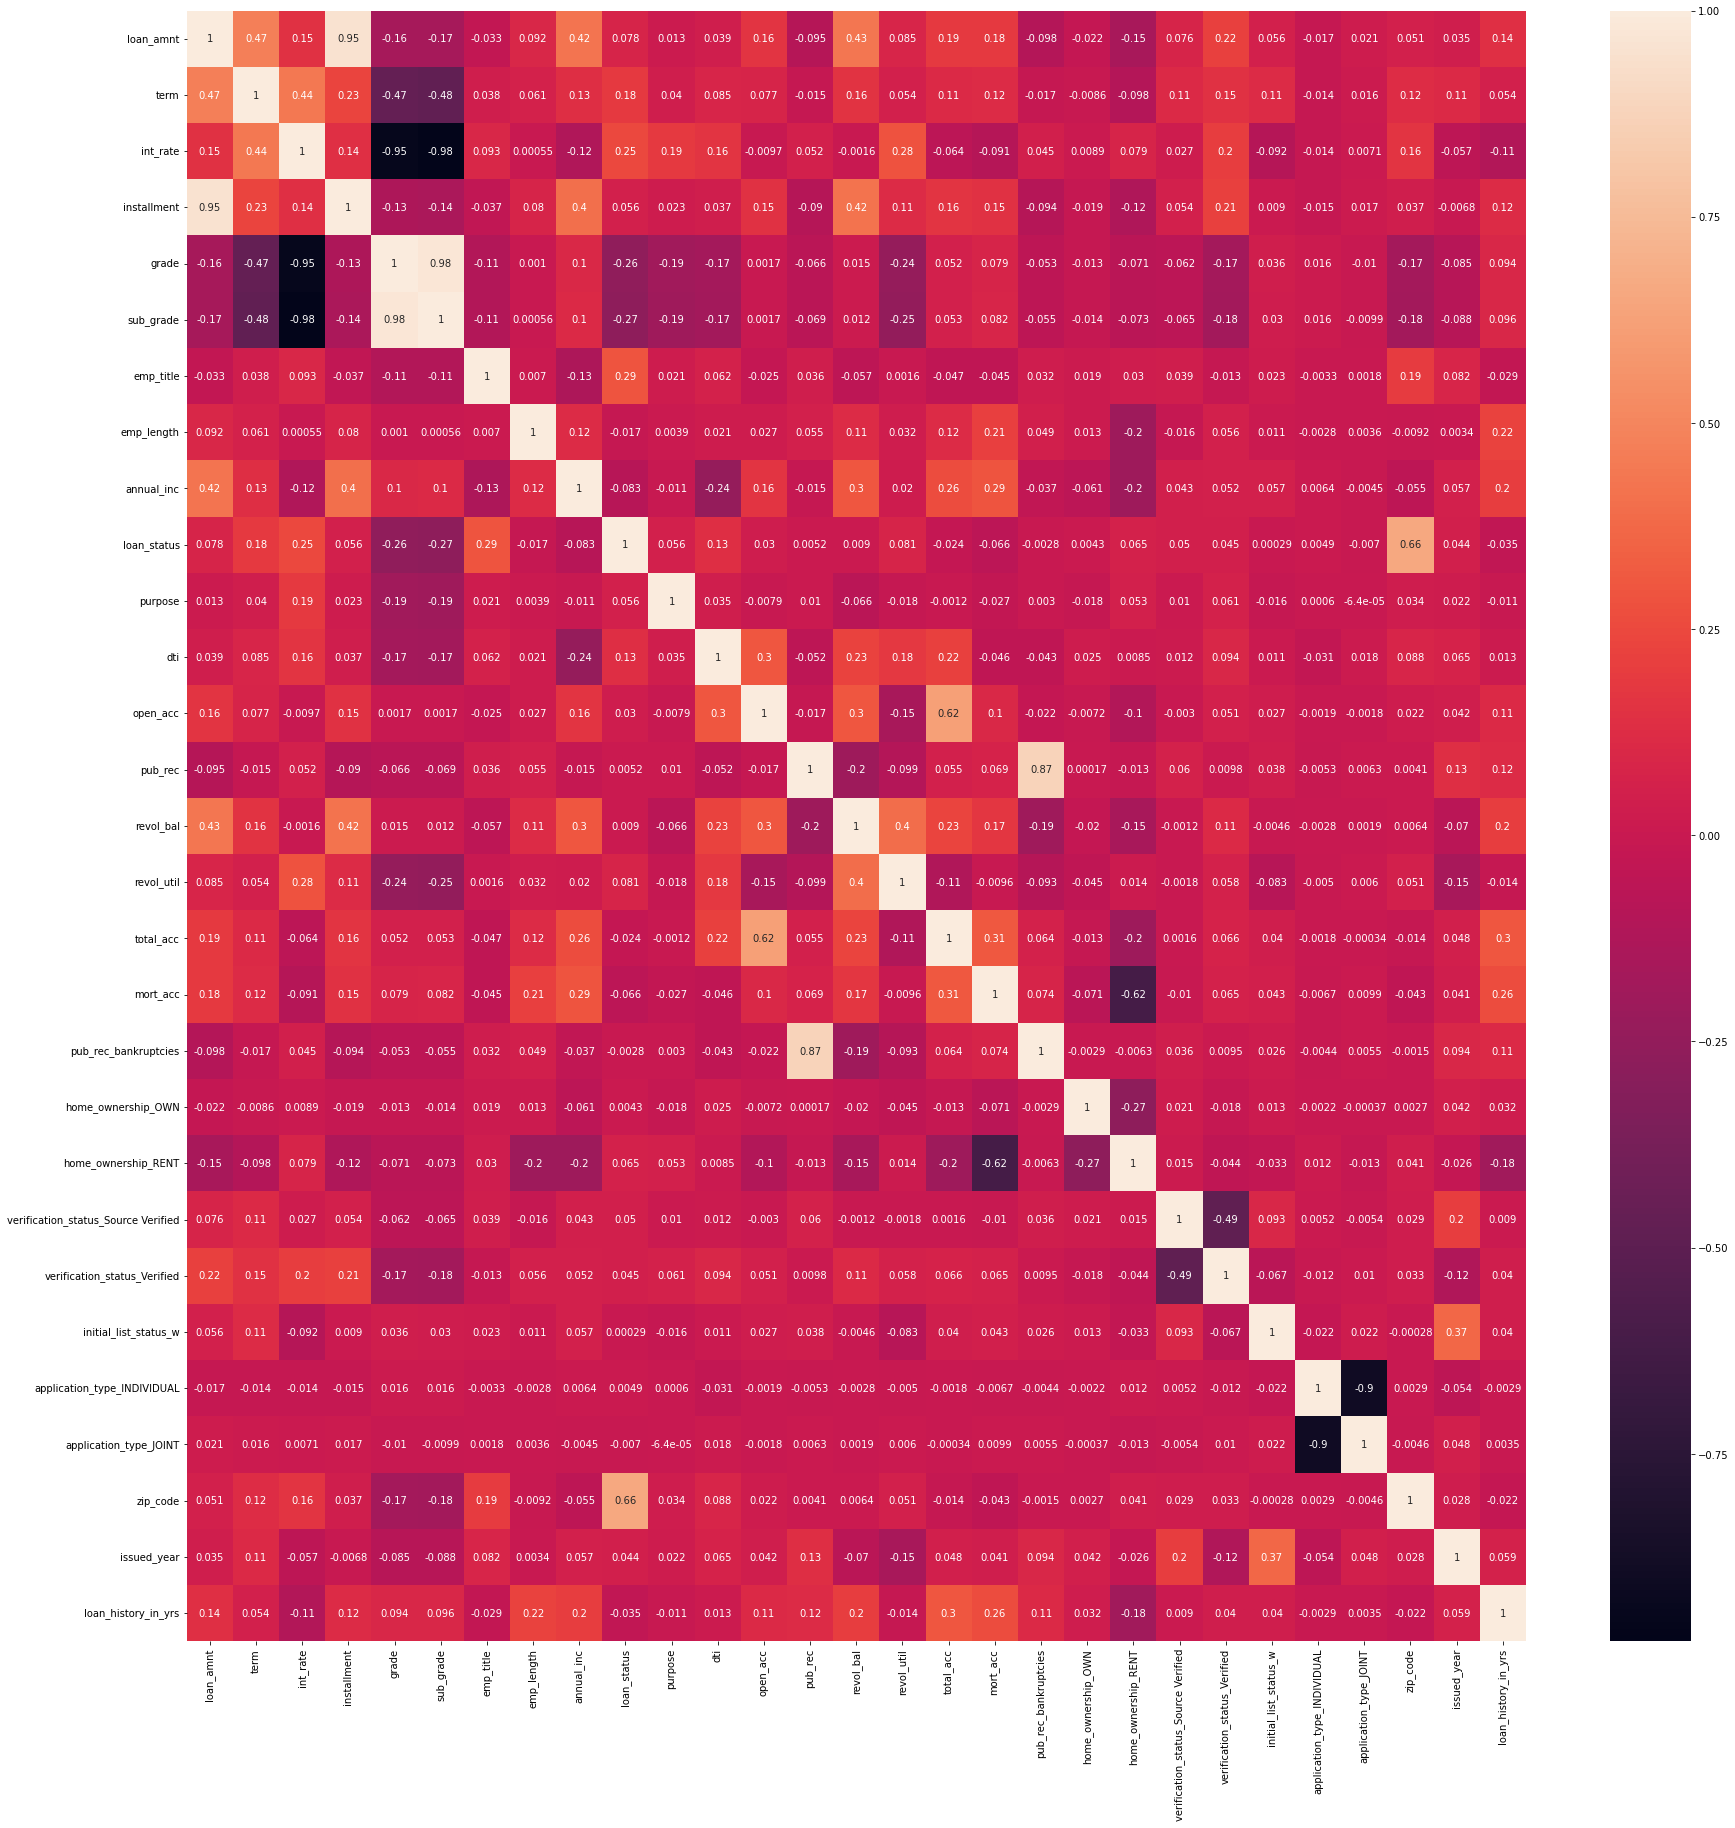

In [68]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr(),annot = True)


- From the above heatmap it is evident that grade and sub_grade have strong correlation.
- Loan amount and Installment also have the strong correlation.

In [69]:
# we are proceeding further to remove the column 'sub_grade'
data = data.drop(['sub_grade','installment','pub_rec_bankruptcies'], axis = 1)

<AxesSubplot:>

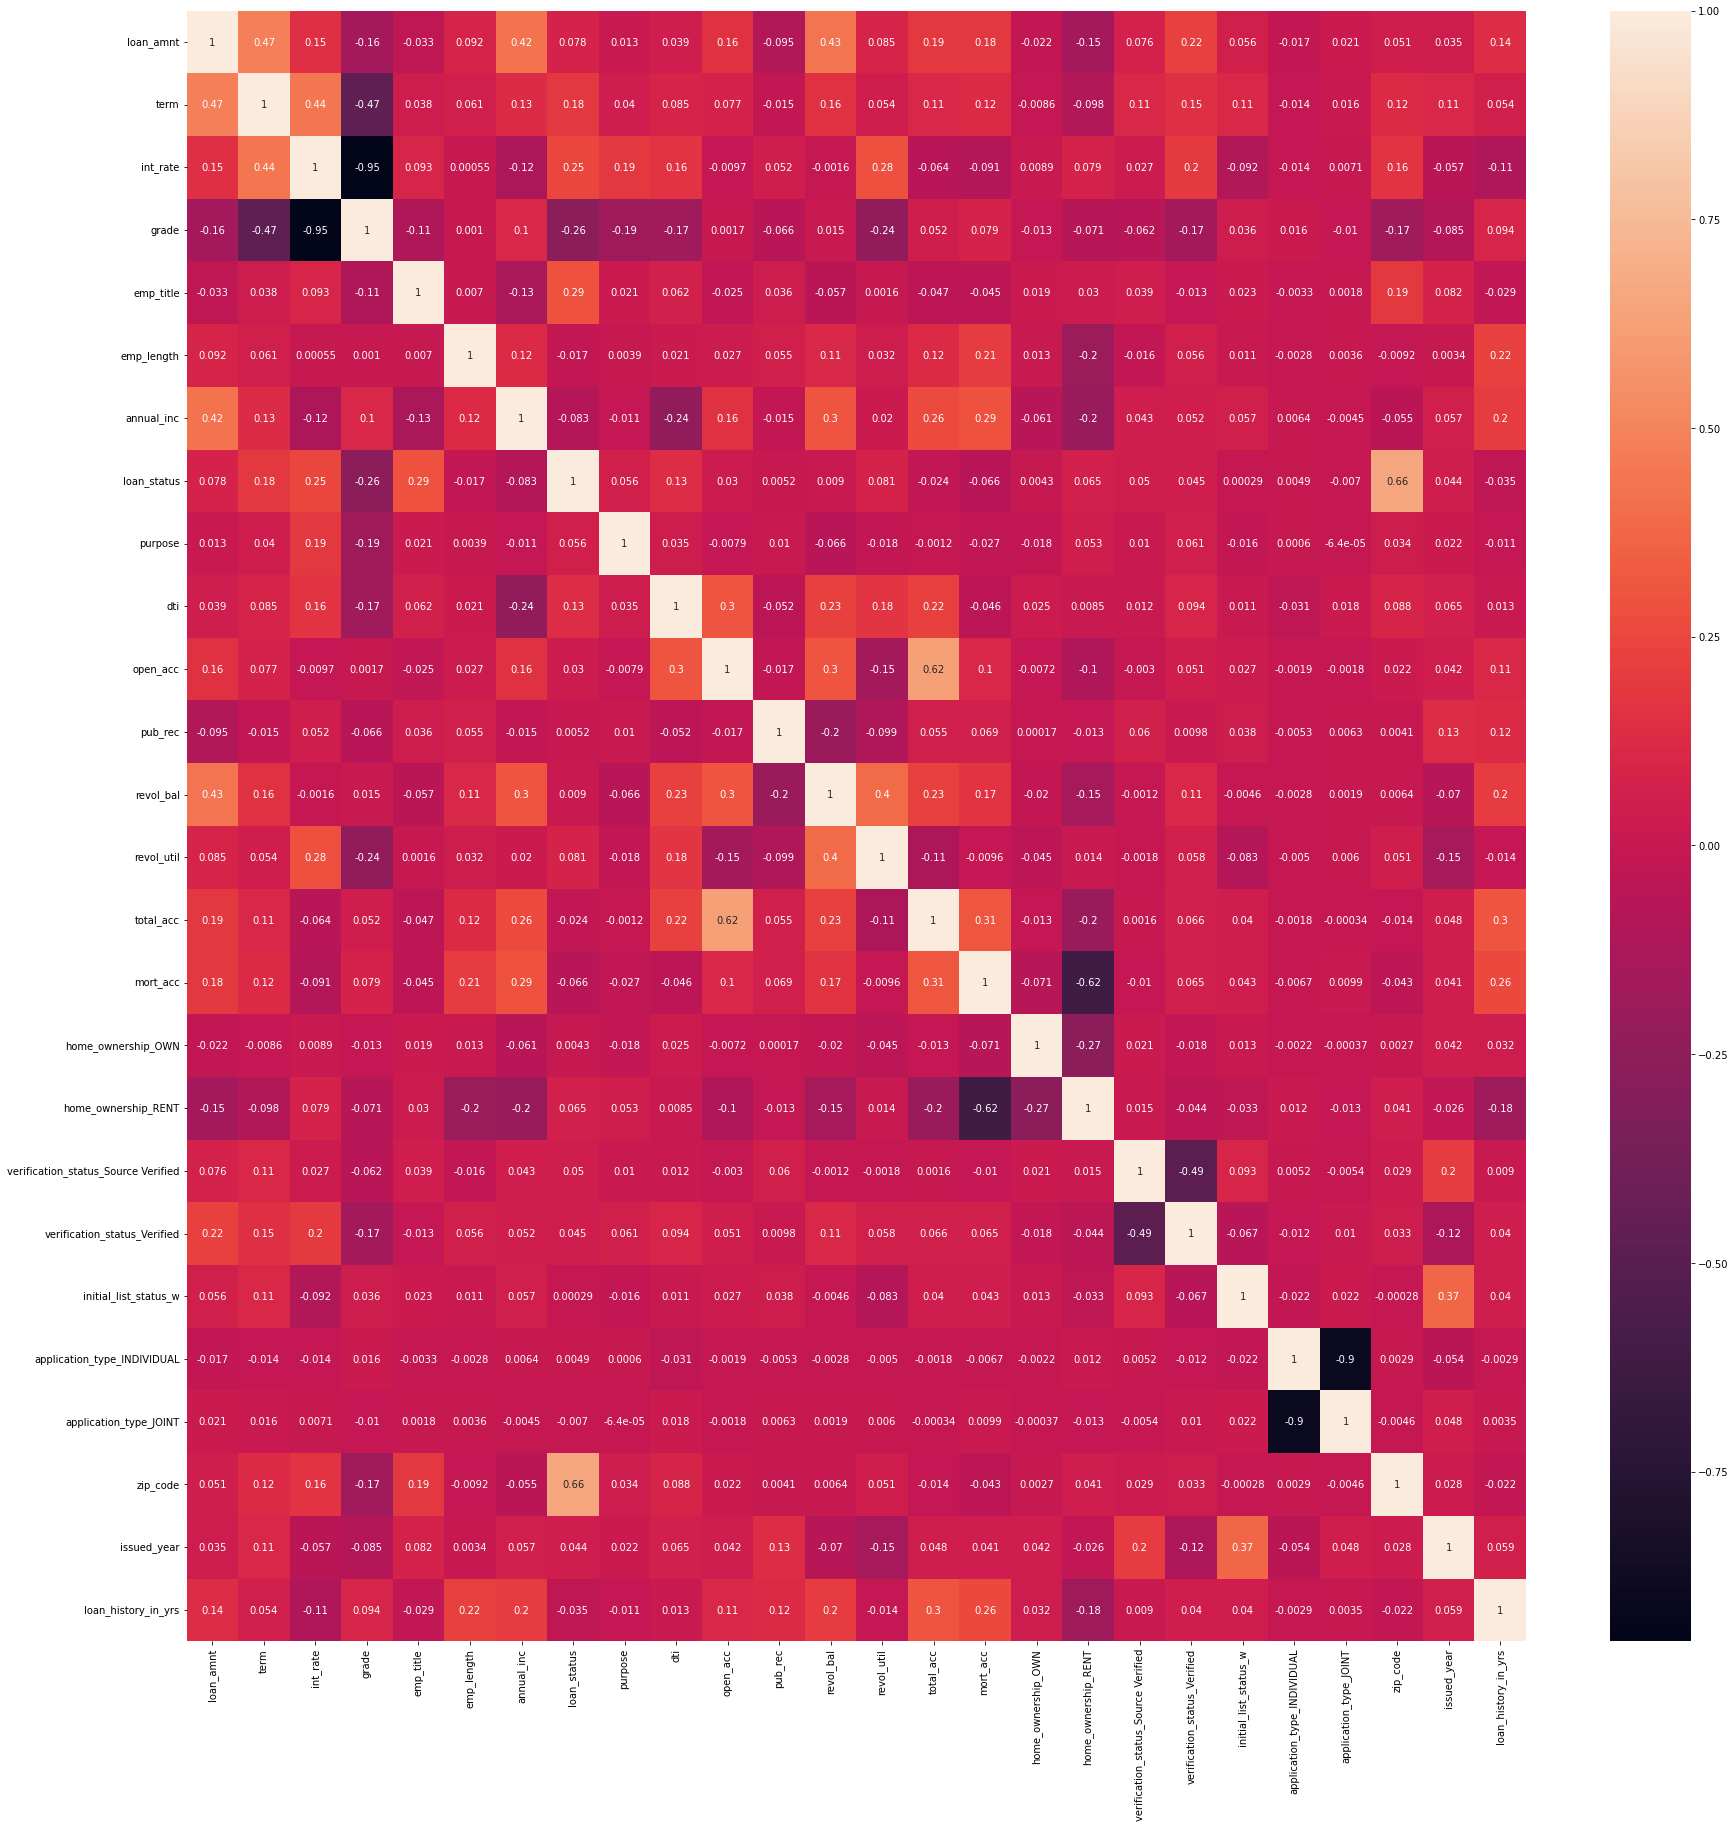

In [70]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr(),annot = True)

## Model Building

In [71]:
x = data.drop(['loan_status'], axis = 1)
y = data['loan_status']

In [72]:
data.head()

,loan_amnt,term,int_rate,grade,emp_title,emp_length,annual_inc,loan_status,purpose,dti,...,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,zip_code,issued_year,loan_history_in_yrs
0,10000.0,36.0,11.44,6,0.253333,10.0,117000.0,0,0.192286,26.24,...,0,1,0,0,1,1,0,0.195648,2015,25
1,8000.0,36.0,11.99,6,0.317273,4.0,65000.0,0,0.209013,22.05,...,0,0,0,0,0,1,0,0.000000,2015,11
2,15600.0,36.0,10.49,6,0.125067,0.0,43057.0,0,0.168131,12.79,...,0,1,1,0,0,1,0,0.000000,2015,8
3,7200.0,36.0,6.49,7,0.198600,6.0,54000.0,0,0.168131,2.60,...,0,1,0,0,0,1,0,0.000000,2014,8
4,24375.0,60.0,17.27,5,0.198600,9.0,55000.0,1,0.168131,33.95,...,0,0,0,1,0,1,0,1.000000,2013,14


In [73]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'annual_inc', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'zip_code', 'issued_year',
       'loan_history_in_yrs'],
      dtype='object')

In [74]:
data['loan_status'].value_counts()

0    228549
1     56638
Name: loan_status, dtype: int64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
 stratify=y, random_state=42)

In [76]:
print(x_train.shape)
print(x_test.shape)

(199630, 25)
(85557, 25)


In [77]:
columns = x_train.columns

In [78]:
#Standardizing the data helps us maintain the coefficients in same scale.
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [79]:
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [80]:
y_pred = logreg.predict(x_test)

In [81]:
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(x_test,y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.835


### Confusion Matrix

In [82]:
y_test.shape

(85557,)

In [83]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[57743 10822]
 [ 3267 13725]]


### Classification Report

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     68565
           1       0.56      0.81      0.66     16992

    accuracy                           0.84     85557
   macro avg       0.75      0.82      0.78     85557
weighted avg       0.87      0.84      0.85     85557



## Check for Multicolinearity

In [85]:
import statsmodels.api as sm

In [86]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
columns_list = columns.insert(0,'const')
logm1.exog_names[:] = columns_list
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               199630
Model:                            GLM   Df Residuals:                   199604
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47649.
Date:                Tue, 29 Nov 2022   Deviance:                       95299.
Time:                        21:36:48   Pearson chi2:                 1.08e+05
No. Iterations:                    13   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -10.2374      0.656    -15.608      0.000     -11.523      -8.952
loan_amnt                               0.5948      0.055     10.816      0.000       0.487       0.703
term                                    0.4838      0.023     20.714      0.000       0.438       0.530
int_rate                                0.2459      0.145      1.698      0.089      -0.038       0.530
grade                                  -1.7254      0.139    -12.418      0.000      -1.998      -1.453
emp_title                               6.8498      0.087     78.900      0.000       6.680       7.020
emp_length                             -0.0987      0.024     -4.193      0.000      -0.145      -0.053
annual_inc                             -0.5490      0.059     -9.261      0.000      -0.665      -0.433
purpose                                 0.3543      0.063      5.581      0.000       0.230       0.479
dti                                     0.9025      0.049     18.506      0.000       0.807       0.998
open_acc                                0.8055      0.059     13.597      0.000       0.689       0.922
pub_rec                                -0.0100      0.023     -0.431      0.667      -0.056       0.036
revol_bal                              -0.3885      0.051     -7.566      0.000      -0.489      -0.288
revol_util                              0.7077      0.053     13.259      0.000       0.603       0.812
total_acc                              -0.5785      0.059     -9.761      0.000      -0.695      -0.462
mort_acc                               -0.0577      0.023     -2.468      0.014      -0.103      -0.012
home_ownership_OWN                      0.0618      0.032      1.963      0.050       0.000       0.124
home_ownership_RENT                     0.2453      0.023     10.551      0.000       0.200       0.291
verification_status_Source Verified     0.1606      0.021      7.535      0.000       0.119       0.202
verification_status_Verified            0.0514      0.022      2.290      0.022       0.007       0.095
initial_list_status_w                  -0.0702      0.018     -3.917      0.000      -0.105      -0.035
application_type_INDIVIDUAL             0.0631      0.578      0.109      0.913      -1.070       1.196
application_type_JOINT                 -1.1013      0.668     -1.649      0.099      -2.410       0.208
zip_code                               36.1059      1.276     28.295      0.000      33.605      38.607
issued_year                             0.0489      0.037      1.317      0.188      -0.024       0.122
loan_history_in_yrs                     0.2323      0.091      2.544      0.011       0.053       0.411
===================================================================

In [87]:
def calc_vif(X):
    
 # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [88]:
calc_vif(x)

,Feature,VIF
23,issued_year,6283.71
20,application_type_INDIVIDUAL,5581.64
3,grade,199.04
2,int_rate,130.16
7,purpose,83.71
1,term,30.44
9,open_acc,14.75
13,total_acc,13.13
6,annual_inc,10.35
12,revol_util,9.72


In [89]:
#Dropping the variables with high VIF and p-value greater than 0.05
x.drop(columns=['application_type_INDIVIDUAL','issued_year'], axis=1, inplace=True)
calc_vif(x)

,Feature,VIF
7,purpose,73.87
2,int_rate,38.99
3,grade,33.52
1,term,28.91
9,open_acc,14.67
13,total_acc,13.12
6,annual_inc,10.22
12,revol_util,9.71
8,dti,8.04
0,loan_amnt,7.84


In [90]:
x.drop(columns=['purpose','int_rate'], axis=1, inplace=True)
calc_vif(x)

,Feature,VIF
1,term,18.83
7,open_acc,13.85
11,total_acc,13.08
2,grade,11.63
5,annual_inc,10.01
6,dti,7.82
0,loan_amnt,7.81
10,revol_util,7.59
20,loan_history_in_yrs,7.41
9,revol_bal,5.73


In [91]:
x.drop(columns=['term','open_acc'], axis=1, inplace=True)
calc_vif(x)

,Feature,VIF
1,grade,11.32
4,annual_inc,9.83
9,total_acc,9.04
18,loan_history_in_yrs,7.31
5,dti,7.10
8,revol_util,6.93
0,loan_amnt,6.54
7,revol_bal,5.31
2,emp_title,4.76
10,mort_acc,4.61


In [92]:
x.drop(columns=['grade'], axis=1, inplace=True)
calc_vif(x)

,Feature,VIF
8,total_acc,8.91
3,annual_inc,8.88
17,loan_history_in_yrs,7.03
4,dti,6.94
7,revol_util,6.90
0,loan_amnt,6.48
6,revol_bal,5.31
1,emp_title,4.57
9,mort_acc,4.46
2,emp_length,3.92


## Re-Running the Model

In [93]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.30,
 stratify=y, random_state=42)

In [94]:
columns1 = x_train1.columns

In [95]:
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

In [96]:
logreg1 = LogisticRegression(class_weight = 'balanced')
logreg1.fit(x_train1, y_train1)

LogisticRegression(class_weight='balanced')

In [97]:
y_pred1 = logreg1.predict(x_test1)

In [98]:
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg1.score(x_test1,y_test1)))

Accuracy of Logistic Regression Classifier on test set: 0.819


In [99]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     68565
           1       0.53      0.80      0.64     16992

    accuracy                           0.82     85557
   macro avg       0.74      0.81      0.76     85557
weighted avg       0.86      0.82      0.83     85557



In [100]:
logreg1.coef_

array([[ 1.63303224,  7.64958419, -0.07862763, -0.8255365 ,  1.27571884,
         0.07340443, -0.64266288,  1.12927287, -0.09753979, -0.09132947,
         0.0866726 ,  0.24293333,  0.3427789 ,  0.28348221, -0.04650565,
        -1.08627497, 28.37193996, -0.24613165]])

In [101]:
logreg1.intercept_

array([-8.59648778])

In [102]:
logm2 = sm.GLM(y_train1,(sm.add_constant(x_train1)), family = sm.families.Binomial())
columns1_list = columns1.insert(0,'const')
logm2.exog_names[:] = columns1_list
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               199630
Model:                            GLM   Df Residuals:                   199611
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49819.
Date:                Tue, 29 Nov 2022   Deviance:                       99638.
Time:                        21:39:25   Pearson chi2:                 1.09e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -11.3234      0.251    -45.072      0.000     -11.816     -10.831
loan_amnt                               1.6874      0.049     34.413      0.000       1.591       1.784
emp_title                               6.9296      0.085     81.839      0.000       6.764       7.096
emp_length                             -0.0816      0.023     -3.555      0.000      -0.127      -0.037
annual_inc                             -0.8210      0.058    -14.206      0.000      -0.934      -0.708
dti                                     1.2942      0.046     27.903      0.000       1.203       1.385
pub_rec                                 0.0743      0.023      3.283      0.001       0.030       0.119
revol_bal                              -0.6792      0.048    -14.278      0.000      -0.772      -0.586
revol_util                              1.1192      0.048     23.473      0.000       1.026       1.213
total_acc                              -0.0965      0.048     -2.013      0.044      -0.190      -0.003
mort_acc                               -0.0873      0.023     -3.862      0.000      -0.132      -0.043
home_ownership_OWN                      0.0794      0.031      2.589      0.010       0.019       0.139
home_ownership_RENT                     0.2529      0.023     11.180      0.000       0.209       0.297
verification_status_Source Verified     0.3443      0.020     16.814      0.000       0.304       0.384
verification_status_Verified            0.2844      0.022     13.228      0.000       0.242       0.327
initial_list_status_w                  -0.0409      0.016     -2.500      0.012      -0.073      -0.009
application_type_JOINT                 -1.1458      0.335     -3.423      0.001      -1.802      -0.490
zip_code                               35.8068      1.238     28.924      0.000      33.380      38.233
loan_history_in_yrs                    -0.2670      0.089     -2.984      0.003      -0.442      -0.092
=======================================================================================================
"""

## ROC AUC Curve

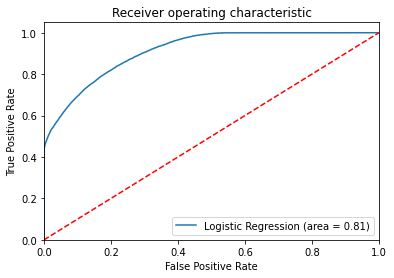

In [112]:
logit_roc_auc = roc_auc_score(y_test1, logreg1.predict(x_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg1.predict_proba(x_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Precision Recall Curve

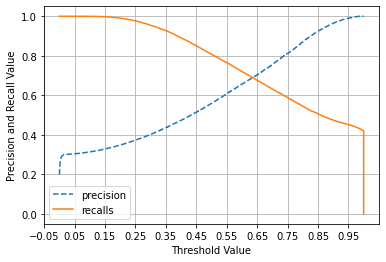

In [113]:
def precision_recall_curve_plot(y_test1, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test1, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
 # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
 # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg.predict_proba(x_test)[:,1])

- we can take a threshold which gives us the better precision and recall by analyzing he graph instead of standard 0.5.